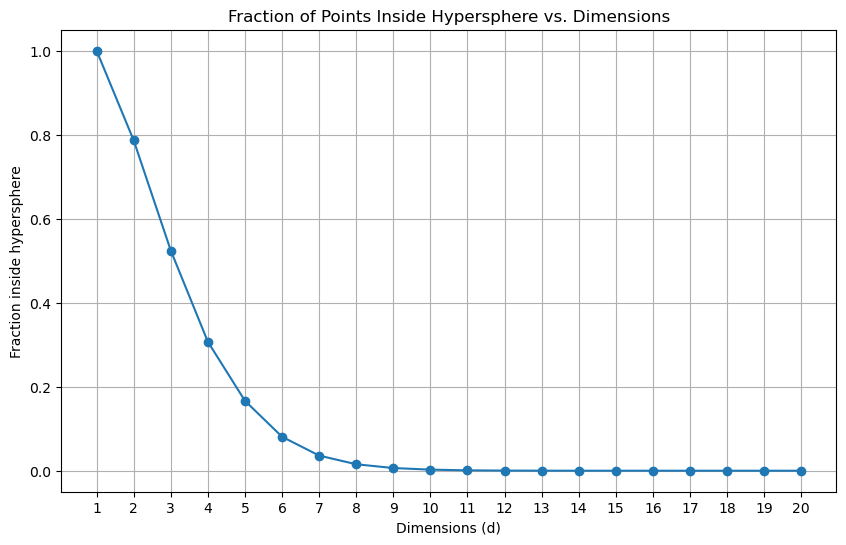

In [8]:
import numpy as np
import matplotlib.pyplot as plt


n = 100000
dimensions = range(1, 21)

fractions = []

for d in dimensions:
    #generate n vectors with d dimensions, components uniformly from -1 to 1
    vectors = np.random.uniform(-1, 1, (n, d))
    
    #calculate the Euclidean distance from the origin
    distances = np.linalg.norm(vectors, axis=1)
    
    #determine the fraction of vectors inside the hypersphere of radius 1
    inside_sphere = np.sum(distances <= 1)
    fraction = inside_sphere / n
    fractions.append(fraction)


plt.figure(figsize=(10, 6))
plt.plot(dimensions, fractions, marker='o')


plt.xticks(range(1, 21))

plt.title('Fraction of Points Inside Hypersphere vs. Dimensions')
plt.xlabel('Dimensions (d)')
plt.ylabel('Fraction inside hypersphere')
plt.grid(True)
plt.show()


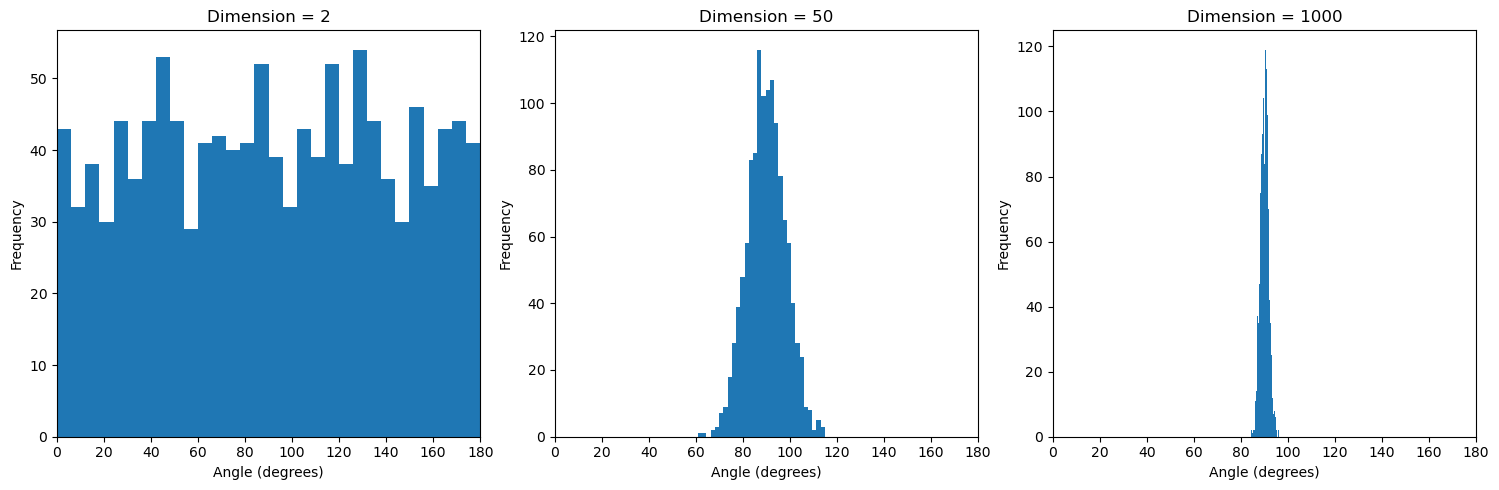

In [9]:
import numpy as np
import matplotlib.pyplot as plt


def calculate_angles(vectors):
    num_vectors = vectors.shape[0]
    angles = []
    for i in range(num_vectors):
        for j in range(i + 1, num_vectors):
            dot_product = np.dot(vectors[i], vectors[j])
            norm_i = np.linalg.norm(vectors[i])
            norm_j = np.linalg.norm(vectors[j])
            cosine_similarity = dot_product / (norm_i * norm_j)
            # Clamp cosine similarity to avoid numerical issues with acos
            cosine_similarity = np.clip(cosine_similarity, -1.0, 1.0)
            angle = np.arccos(cosine_similarity)  # Angle in radians
            angle_degrees = np.degrees(angle)  # Convert angle to degrees
            angles.append(angle_degrees)
    return angles

#parameters
dims = [2, 50, 1000]
num_vectors = 50


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, d in enumerate(dims):
    
    vectors = np.random.normal(0, 1, (num_vectors, d))
  
    angles = calculate_angles(vectors)
   
    axes[i].hist(angles, bins=30)
    axes[i].set_title(f'Dimension = {d}')
    axes[i].set_xlabel('Angle (degrees)')
    axes[i].set_ylabel('Frequency')
    axes[i].set_xlim(0, 180)  # Set x-axis limits to make comparison easier

plt.tight_layout()
plt.show()


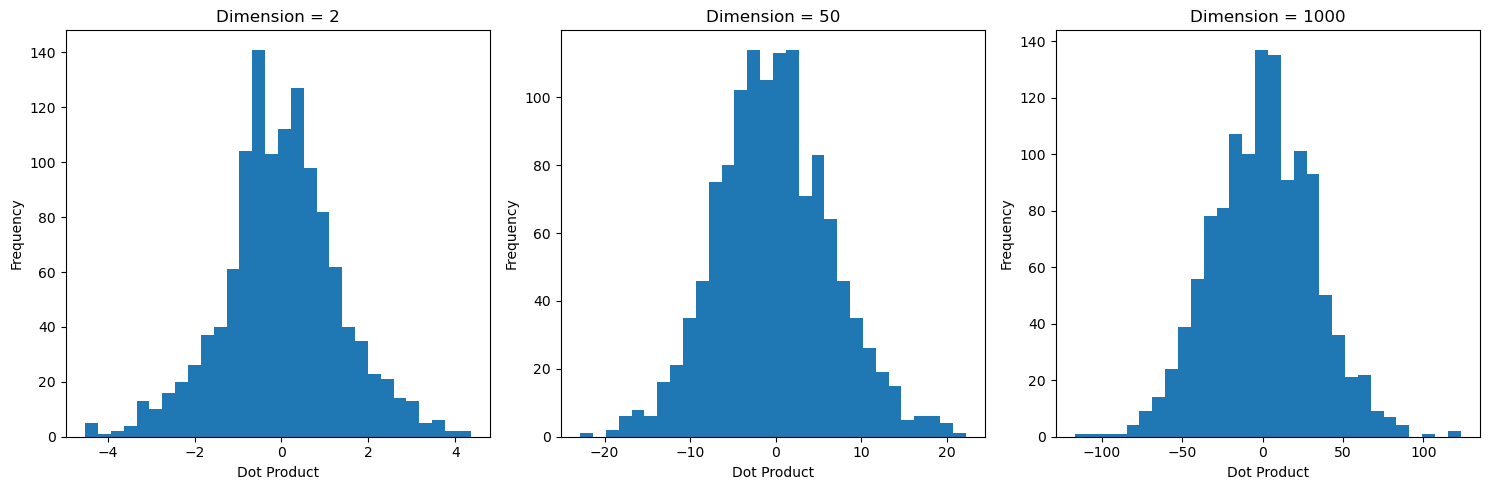

In [14]:
import numpy as np
import matplotlib.pyplot as plt


def compute_dot_products(vectors):
    num_vectors = vectors.shape[0]
    dot_products = []
    for i in range(num_vectors):
        for j in range(i + 1, num_vectors):
            dot_product = np.dot(vectors[i], vectors[j])
            dot_products.append(dot_product)
    return dot_products


dims = [2, 50, 1000]
num_vectors = 50


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, d in enumerate(dims):
    
    vectors = np.random.normal(0, 1, (num_vectors, d))
   
    dot_products = compute_dot_products(vectors)
    
    axes[i].hist(dot_products, bins=30)
    axes[i].set_title(f'Dimension = {d}')
    axes[i].set_xlabel('Dot Product')
    axes[i].set_ylabel('Frequency')
    
    

plt.tight_layout()
plt.show()


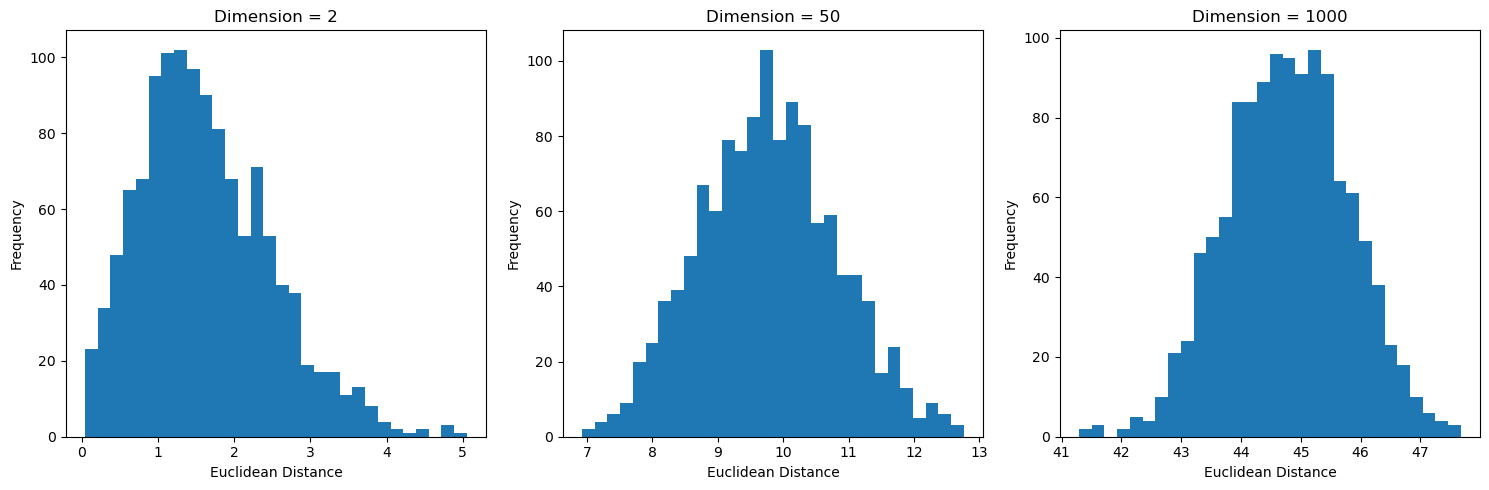

In [11]:
import numpy as np
import matplotlib.pyplot as plt


def compute_distances(vectors):
    num_vectors = vectors.shape[0]
    distances = []
    for i in range(num_vectors):
        for j in range(i + 1, num_vectors):
            distance = np.linalg.norm(vectors[i] - vectors[j])
            distances.append(distance)
    return distances


dims = [2, 50, 1000]
num_vectors = 50


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, d in enumerate(dims):
    
    vectors = np.random.normal(0, 1, (num_vectors, d))
    
    distances = compute_distances(vectors)
    
    axes[i].hist(distances, bins=30)
    axes[i].set_title(f'Dimension = {d}')
    axes[i].set_xlabel('Euclidean Distance')
    axes[i].set_ylabel('Frequency')
    
    

plt.tight_layout()
plt.show()


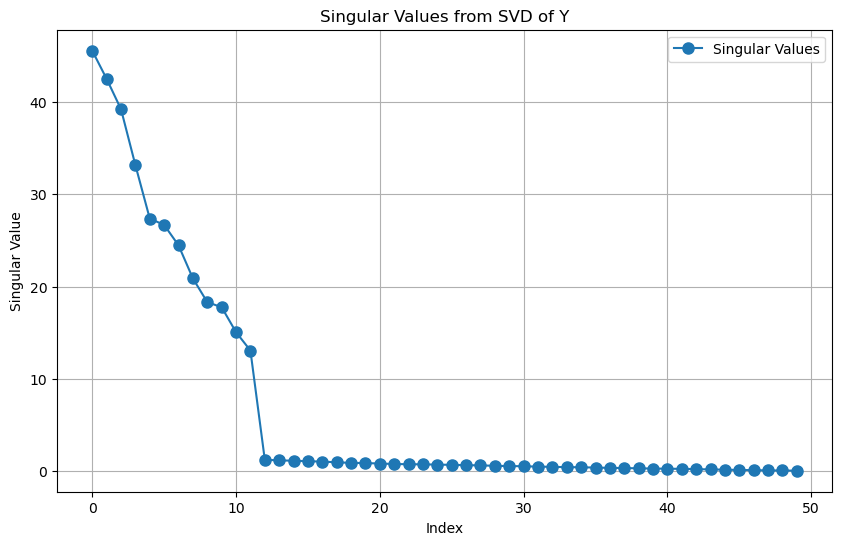

Number of singular values: 50
Top 10 singular values: [45.56530356 42.51357408 39.22327132 33.16080821 27.3681336  26.67987351
 24.46503659 20.87755376 18.30624934 17.75609104]


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



Y = pd.read_csv('Y.csv').values

#performing SVD
U, S, Vt = np.linalg.svd(Y)


plt.figure(figsize=(10, 6))
plt.plot(S, 'o-', markersize=8, label='Singular Values')
plt.title('Singular Values from SVD of Y')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.grid(True)
plt.legend()
plt.show()


print(f"Number of singular values: {len(S)}")
print(f"Top 10 singular values: {S[:10]}")


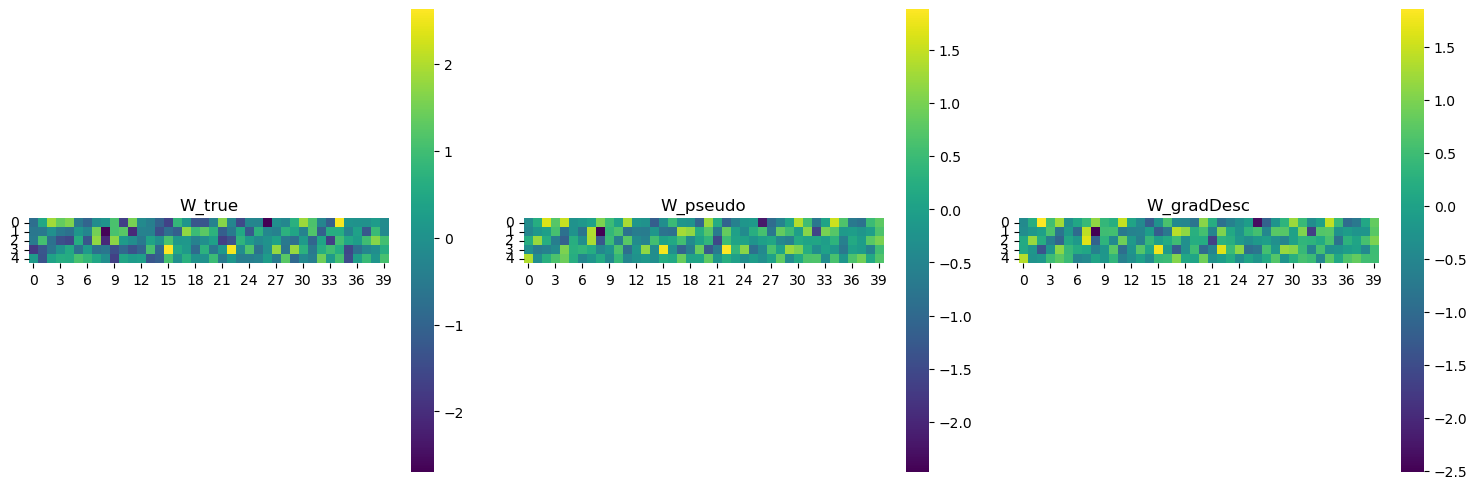

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPRegressor

#generating data
n = 20
d = 40
D = 5
np.random.seed(42)
X = np.random.uniform(-1, 1, size=(n, d))
W_true = np.random.normal(0, 1, size=(D, d))
epsilon = np.random.normal(0, np.sqrt(0.2), size=(n, D))
Y = np.dot(X, W_true.T) + epsilon

#computing weights using pseudo-inverse method
alpha = 0.1
X_pseudo = np.linalg.pinv(X.T @ X + alpha * np.eye(d)) @ X.T
W_pseudo = X_pseudo @ Y

W_pseudo = W_pseudo.T

#computing weights using gradient descent
model_gd = MLPRegressor(hidden_layer_sizes=(), 
                        activation='identity', 
                        solver='sgd', 
                        learning_rate_init=0.01, 
                        max_iter=1000)
model_gd.fit(X, Y)
W_gradDesc = model_gd.coefs_[0].T

#plotting heatmaps
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.heatmap(W_true, ax=axes[0], cmap='viridis', cbar=True, square=True)
axes[0].set_title('W_true')

sns.heatmap(W_pseudo, ax=axes[1], cmap='viridis', cbar=True, square=True)
axes[1].set_title('W_pseudo')

sns.heatmap(W_gradDesc, ax=axes[2], cmap='viridis', cbar=True, square=True)
axes[2].set_title('W_gradDesc')

plt.tight_layout()
plt.show()
